# Part A


#### 1. Import and Understand the data [12 Marks]

#### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.
#### [2 Marks] Hint: You can extract it Manually by losing 2 marks.


In [ ]:
import zipfile
import os
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import textwrap
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam

2023-07-30 20:13:24.545639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
zip_file = "/Users/apple/Github/CV/CV_MIlestone/plant-seedlings-classification.zip"
extract_here = "/Users/apple/Github/CV/CV_MIlestone/Plant-seedlings-classification"

In [ ]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_here)

#### B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
#### Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [ ]:
count = 0
for i in os.listdir("/Users/apple/Github/CV/CV_MIlestone/Plant-seedlings-classification/plant-seedlings-classification/train"):
    if i != ".DS_Store":
        print(i)
    count += 1

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [ ]:
train_file_path = "/Users/apple/Github/CV/CV_MIlestone/Plant-seedlings-classification/plant-seedlings-classification/train"

In [ ]:
Image_by_class = []
for folders in os.listdir("./Plant-seedlings-classification/plant-seedlings-classification/train"):
    if folders != ".DS_Store":
        for img in os.listdir(os.path.join("./Plant-seedlings-classification/plant-seedlings-classification/train/",folders)):
            Image_by_class.append({"Name of image " : img,
        "Actual Image" : os.path.join("./Plant-seedlings-classification/plant-seedlings-classification/train/",folders, img),
          "Class" : folders})


In [ ]:
dataset = pd.DataFrame(Image_by_class)
dataset.head(3)

,Name of image,Actual Image,Class
0,6a4ef17c2.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers
1,0515bc601.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers
2,0ac327873.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers


#### C. Write a function that will select n random images and display images along with its species.
#### [4 Marks] Hint: If input for function is 5, it should print 5 random images along with its labels.

In [ ]:
def Random_images(dataframe, n):
    # Check if n is valid
    if n <= 0 or n > len(dataframe):
        print(f"Invalid value of n. Please select a positive integer smaller than {len(dataframe)}")
        return

    random_rows = random.sample(range(len(dataframe)), n)

    rows = 1
    col = n
    plt.figure(figsize=(10, 5))
    for i, row in enumerate(random_rows, start=1):
        path = dataframe.iloc[row]['Actual Image']
        img_class = dataframe.iloc[row]['Class']

        image = PIL.Image.open(path)
        plt.subplot(1, n, i)
        plt.imshow(image)
        plt.title("\n".join(textwrap.wrap(img_class, 5)))
        plt.axis('off')
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()
    plt.show()

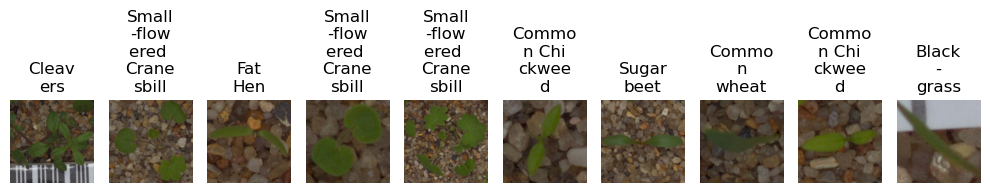

In [ ]:
Random_images(dataset, 10)

#### 2. Data preprocessing [8 Marks]
#### A. Create X & Y from the DataFrame. [2 Marks]

In [ ]:
X = []
for i in dataset["Actual Image"]:
    img = cv2.imread(i)
    img_array = np.array(img)
    X.append(img_array)

Y = list(dataset["Class"])

In [ ]:
print(set(Y))

{'Scentless Mayweed', 'Charlock', 'Maize', 'Loose Silky-bent', 'Black-grass', 'Sugar beet', 'Cleavers', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Common Chickweed', 'Common wheat', 'Fat Hen'}


#### B. Encode labels of the images. [2 Marks]

In [ ]:
Y1 = np.array(Y)

In [ ]:
Custom_Labels = {"Cleavers" : 0,
"Sugar beet" : 1,
"Common Chickweed" : 2,
"Loose Silky-bent" : 3,
"Scentless Mayweed" : 4,
"Shepherds Purse" : 5,
"Fat Hen" : 6,
"Common wheat" : 7,
"Black-grass" : 8,
"Small-flowered Cranesbill" : 9,
"Charlock" : 10,
"Maize" : 11,
}

In [ ]:
encoded_labels = pd.Series(Y).map(Custom_Labels)

In [ ]:
dataset1 = dataset.copy()
dataset1["encoded_labels"] = encoded_labels
dataset1.head(2)

,Name of image,Actual Image,Class,encoded_labels
0,6a4ef17c2.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0
1,0515bc601.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0


#### C. Unify shape of all the images. [2 Marks]

#### D. Normalise all the images. [2 Marks]

In [ ]:
X_resized = []
target_size = (224, 224)
for path in dataset1["Actual Image"]:
    image = cv2.imread(path)
    resized_image = cv2.resize(image, target_size)
    normalized_image = resized_image.astype(np.float32) / 255.0
    X_resized.append(normalized_image)
X_resized = np.array(X_resized)

In [ ]:
print ("Unified and Normalised shape of all the images is : {}".format(X_resized.shape))

Unified and Normalised shape of all the images is : (4750, 224, 224, 3)


#### 3. Model training [10 Marks]
#### Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.

#### A. Split the data into train and test data. [2 Marks]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, encoded_labels, test_size=0.20, stratify=Y, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3800, 224, 224, 3)
(950, 224, 224, 3)
(3800,)
(950,)


In [ ]:
print(Y_train.value_counts())

3     523
2     489
4     413
9     397
6     380
10    312
1     308
0     229
8     210
5     185
7     177
11    177
dtype: int64


#### B. Create new CNN architecture to train the model. [4 Marks]

In [ ]:
#model
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape=(224, 224, 3)))

model_1.add(Convolution2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Convolution2D(filters=64, kernel_size=3, activation="relu", padding="same"))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Convolution2D(filters=128, kernel_size=3, activation="relu"))
model_1.add(MaxPooling2D(pool_size=3))

model_1.add(Flatten())

model_1.add(Dense(units=256, activation="relu"))
model_1.add(Dense(units=128, activation="relu"))

model_1.add(Dense(units=12, activation="softmax"))

In [ ]:
optimizer = Adam()
model_1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                        

#### C. Train the model on train data and validate on test data. [2 Marks]

In [ ]:
Model1 = model_1.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), initial_epoch=0)

Epoch 1/15
119/119 [==============================] - 159s 1s/step - loss: 1.8779 - accuracy: 0.3605 - val_loss: 2.8479 - val_accuracy: 0.1421
Epoch 2/15
119/119 [==============================] - 145s 1s/step - loss: 0.9485 - accuracy: 0.6729 - val_loss: 2.6309 - val_accuracy: 0.2021
Epoch 3/15
119/119 [==============================] - 144s 1s/step - loss: 0.5831 - accuracy: 0.8076 - val_loss: 0.8349 - val_accuracy: 0.7400
Epoch 4/15
119/119 [==============================] - 144s 1s/step - loss: 0.3540 - accuracy: 0.8818 - val_loss: 0.8098 - val_accuracy: 0.7316
Epoch 5/15
119/119 [==============================] - 2911s 25s/step - loss: 0.1934 - accuracy: 0.9282 - val_loss: 0.7098 - val_accuracy: 0.7832
Epoch 6/15
119/119 [==============================] - 149s 1s/step - loss: 0.1280 - accuracy: 0.9537 - val_loss: 0.7403 - val_accuracy: 0.8074
Epoch 7/15
119/119 [==============================] - 145s 1s/step - loss: 0.0897 - accuracy: 0.9692 - val_loss: 0.8162 - val_accuracy: 0.79

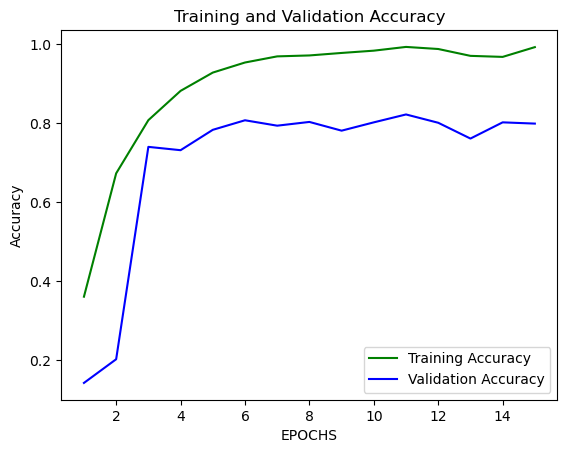

In [ ]:
EPOCHS = 15
Acc_train = Model1.history["accuracy"]
Acc_val = Model1.history["val_accuracy"]
epochs = range(1, EPOCHS + 1)
plt.plot(epochs, Acc_train, "g", label="Training Accuracy" )
plt.plot(epochs, Acc_val, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [ ]:
Y_pred = model_1.predict(X_train)

119/119 [==============================] - 36s 298ms/step


In [ ]:
Y_pred.shape

(3800, 12)

In [ ]:
Y_pred_whole = model_1.predict(X_resized)

149/149 [==============================] - 45s 298ms/step


In [ ]:
Predicted_labels = []
for i in range(0,len(Y_pred_whole)):
    new_value = np.argmax(Y_pred_whole[i])
    Predicted_labels.append(new_value)

In [ ]:
Predicted_labels = np.array(Predicted_labels)
Predicted_labels

array([ 0,  0,  0, ..., 11, 11, 11])

In [ ]:
np.unique(Predicted_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
Custom_Labels = {0 :"Cleavers",
1 : "Sugar beet",
2 : "Common Chickweed",
3 :"Loose Silky-bent",
4 :"Scentless Mayweed",
5 :"Shepherds Purse",
6: "Fat Hen",
7 :"Common wheat",
8 :"Black-grass",
9 :"Small-flowered Cranesbill",
10 :"Charlock",
11 :"Maize"
}

In [ ]:
Predicted_labels_int = [int(label) for label in Predicted_labels]
Predicted_Species = pd.Series(Predicted_labels_int).map(Custom_Labels)
Predicted_Species

0       Cleavers
1       Cleavers
2       Cleavers
3       Cleavers
4       Cleavers
          ...   
4745       Maize
4746       Maize
4747       Maize
4748       Maize
4749       Maize
Length: 4750, dtype: object

In [ ]:
dataset1["Predicted_labels"] = Predicted_labels

In [ ]:
dataset1["Predicted_Species"] = Predicted_Species

In [ ]:
dataset1.head(10)

,Name of image,Actual Image,Class,encoded_labels,Predicted_labels,Predicted_Species
0,6a4ef17c2.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
1,0515bc601.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
2,0ac327873.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
3,94f82e916.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
4,2c5c4d127.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
5,44ef950c3.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
6,952540220.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
7,85b23f3e6.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
8,6820df17f.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,0,Cleavers
9,6cead585f.png,./Plant-seedlings-classification/plant-seedlin...,Cleavers,0,7,Common wheat


In [ ]:
def Random_data(dataframe, n):
    # Check if n is valid
    if n <= 0 or n > len(dataframe):
        print(f"Invalid value of n. Please select a positive integer smaller than {len(dataframe)}")
        return

    random_rows = random.sample(range(len(dataframe)), n)
    #for i, row in enumerate(random_rows, start=1):
        #path = dataframe.iloc[row]['Actual Image']
        #img_class = dataframe.iloc[row]['Class']
    #return dataframe
    row = []
    count = 1
    plt.figure(figsize=(10, 5))
    for i in random_rows:
        new_row = dataframe.iloc[i][["Class", "Predicted_Species", "encoded_labels", "Predicted_labels"]]
        row.append(new_row)
        path = dataframe.iloc[i]['Actual Image']
        original_class = dataframe.iloc[i]['Class']
        predicted_class = dataframe.iloc[i]['Predicted_Species']
        image = PIL.Image.open(path)

        plt.subplot(1, n, count)
        plt.imshow(image)
        plt.title("\n".join(textwrap.wrap(original_class, 5)))
        #plt.title("\n".join(textwrap.wrap(predicted_class, 5)))
        plt.axis('off')
        count = count + 1
    plt.tight_layout()
    plt.show()
    return(pd.DataFrame(row))

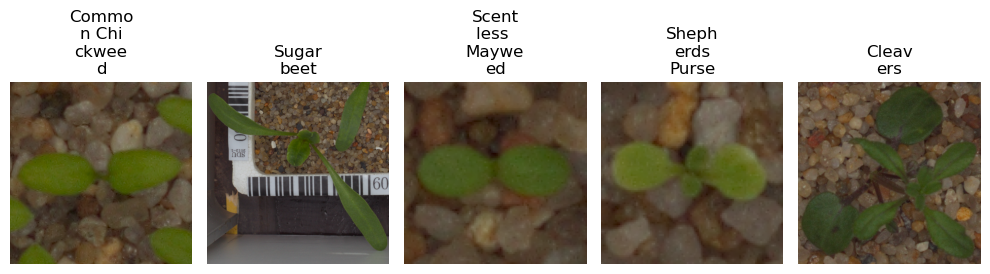

,Class,Predicted_Species,encoded_labels,Predicted_labels
1196,Common Chickweed,Common Chickweed,2,2
595,Sugar beet,Sugar beet,1,1
2009,Scentless Mayweed,Scentless Mayweed,4,4
2603,Shepherds Purse,Scentless Mayweed,5,4
166,Cleavers,Cleavers,0,0


In [ ]:
Random_data(dataset1, 5)

# PART B

#### 1. Import and Understand the data [5 Marks]
#### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]

In [ ]:
%tensorflow_version 2.x
#tf.compat.v1.enable_eager_execution()
import tensorflow as tf
#tf.compat.v1.enable_eager_execution()
#tf.config.run_functions_eagerly(True)
import zipfile
import os
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import textwrap
import cv2

import keras
from keras import losses
from keras import optimizers
from keras.optimizers import Adam, SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print(tf.executing_eagerly())

True
True


In [ ]:
print("TensorFlow version:", tf.__version__)
print("Eager execution enabled:", tf.executing_eagerly())

TensorFlow version: 2.12.0
Eager execution enabled: True
TensorFlow version: 2.12.0
Eager execution enabled: True


In [ ]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127282 sha256=2d7ac7839da1fccbe53d76260989968a196e3c2c5ac1c82febc62ffc0197b6cf
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
import tflearn
from tflearn.datasets import oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
X, Y = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
print(f"Shape of X is : {X.shape}")
print(f"Shape of Y is : {Y.shape}")

Shape of X is : (1360, 224, 224, 3)
Shape of Y is : (1360,)


### B. Print Number of images and shape of the images. [1 Marks]


In [ ]:
print(f"Total number of images in the dataset : {X.shape[0]}")
print(f"Shape of each image is : {X.shape[1:]}")

Total number of images in the dataset : 1360
Shape of each image is : (224, 224, 3)


#### C. Print count of each class from y. [2 Marks]

In [ ]:
values, counts = np.unique(Y, return_counts=True)

In [ ]:
class_counts = pd.DataFrame({"Values" : values, "Counts" : counts})
class_counts = class_counts.transpose()
class_counts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Values,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Counts,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


### 2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]
### A. Display 5 random images. [1 Marks]

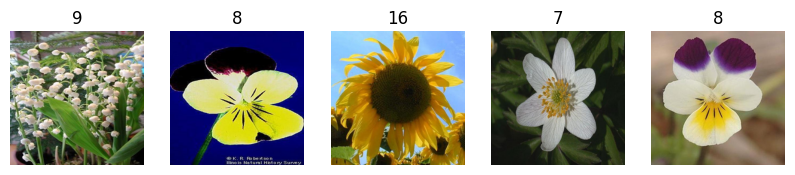

In [ ]:
random_rows = random.sample(range(len(X)), 5)

plt.figure(figsize=(10, 5))

for i, row in enumerate(random_rows):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[row])
    plt.title(Y[row])
    #plt.title("\n".join(textwrap.wrap(predicted_class, 5)))
    plt.axis('off')

### B. Select any image from the dataset and assign it to a variable. [1 Marks]

In [ ]:
X.dtype

dtype('float32')

In [ ]:
X_new = []
for i in range(0, len(X)):
    re_size = cv2.resize(X[i], (224,224))
    normaliszed = re_size / 255.0
    X_new.append(re_size)
X_new = np.array(X_new)

In [ ]:
sample_image = X[1]

### C. Transform the image into grayscale format and display the same. [3 Marks]


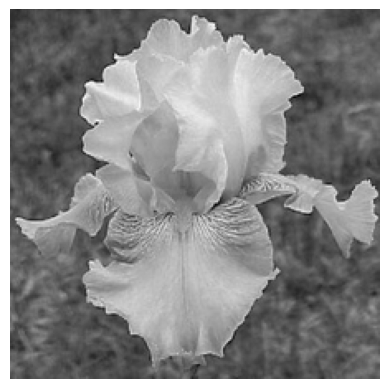

In [ ]:
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis("off");

### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

In [ ]:
sharpening_kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

In [ ]:
sharpened_image = cv2.filter2D(gray_image, -1, sharpening_kernel)

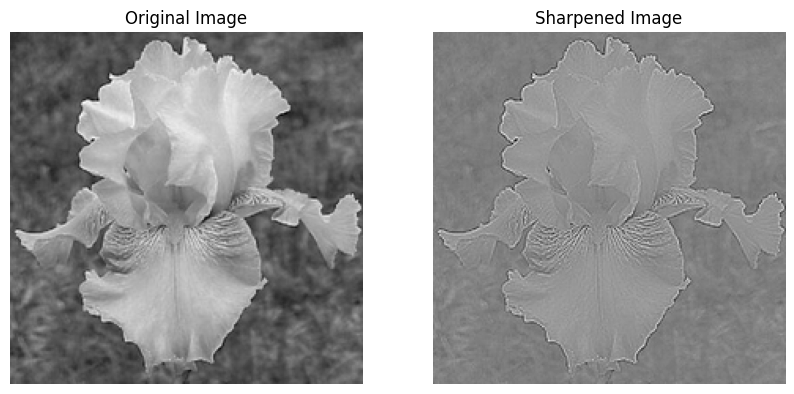

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_image,cmap='gray' )
plt.title("Original Image")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(sharpened_image,cmap='gray' )
plt.title("Sharpened Image")
plt.axis("off");

### E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

In [ ]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

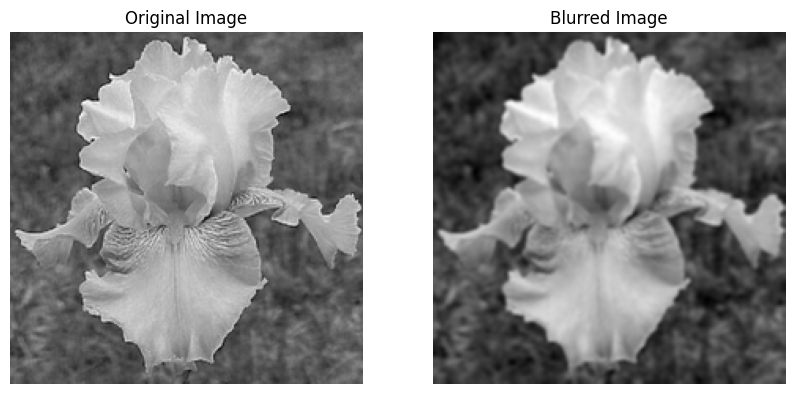

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_image,cmap='gray' )
plt.title("Original Image")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(blurred_image,cmap='gray' )
plt.title("Blurred Image")
plt.axis("off");

In [ ]:
b, g, r = cv2.split(sample_image)
sharpened_b = cv2.filter2D(b, -1, sharpening_kernel)
sharpened_g = cv2.filter2D(g, -1, sharpening_kernel)
sharpened_r = cv2.filter2D(r, -1, sharpening_kernel)

In [ ]:
sharpened_image_1 = cv2.merge([sharpened_r, sharpened_g, sharpened_b])
sharpened_image_1 = cv2.cvtColor(sharpened_image_1, cv2.COLOR_BGR2RGB)

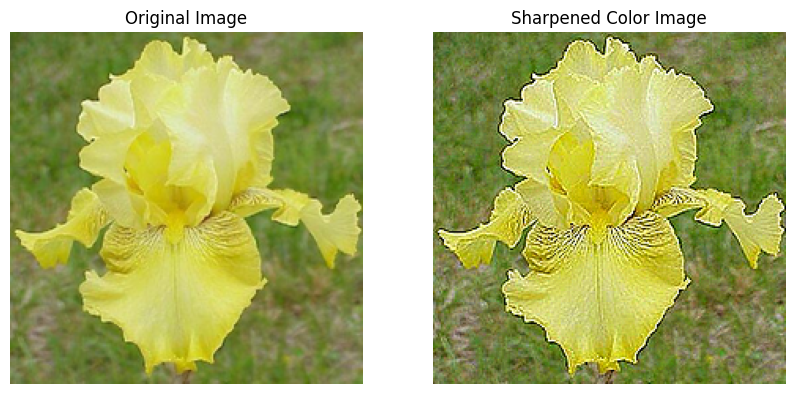

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sample_image,cmap='gray' )
plt.title("Original Image")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(sharpened_image_1,cmap='gray' )
plt.title("Sharpened Color Image")
plt.axis("off");

In [ ]:
blurred_b = cv2.GaussianBlur(b, (5, 5), 0)
blurred_g = cv2.GaussianBlur(g, (5, 5), 0)
blurred_r = cv2.GaussianBlur(r, (5, 5), 0)

In [ ]:
blurred_image_1 = cv2.merge([blurred_r, blurred_g, blurred_b])
blurred_image_1 = cv2.cvtColor(blurred_image_1, cv2.COLOR_BGR2RGB)

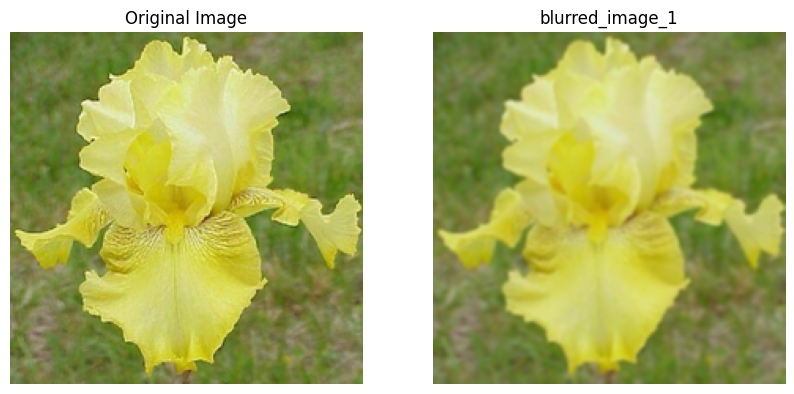

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(sample_image,cmap='gray' )
plt.title("Original Image")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(blurred_image_1,cmap='gray' )
plt.title("blurred_image_1")
plt.axis("off");

### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

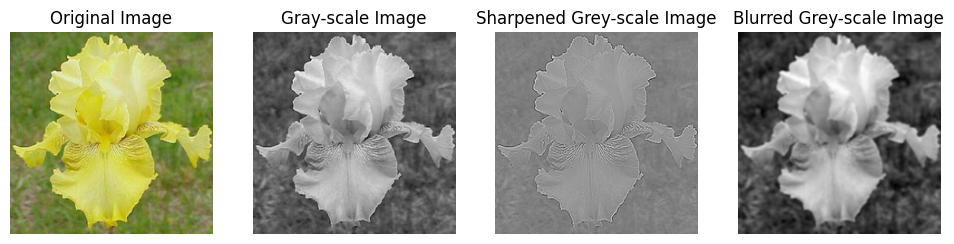

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off");
plt.subplot(1,4,2)
plt.imshow(gray_image, cmap="gray")
plt.title("Gray-scale Image")
plt.axis("off");
plt.subplot(1,4,3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Grey-scale Image")
plt.axis("off");
plt.subplot(1,4,4)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Grey-scale Image")
plt.axis("off");

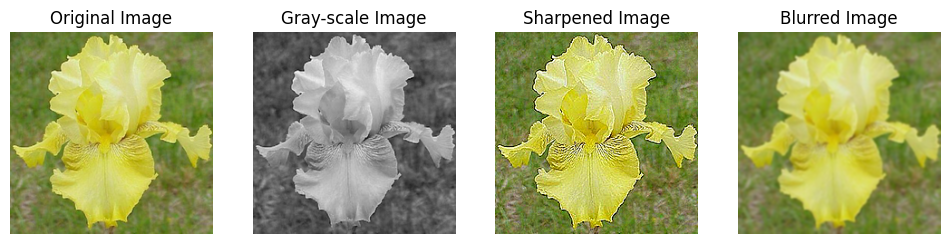

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off");
plt.subplot(1,4,2)
plt.imshow(gray_image, cmap="gray")
plt.title("Gray-scale Image")
plt.axis("off");
plt.subplot(1,4,3)
plt.imshow(sharpened_image_1, cmap="gray")
plt.title("Sharpened Image")
plt.axis("off");
plt.subplot(1,4,4)
plt.imshow(blurred_image_1, cmap="gray")
plt.title("Blurred Image")
plt.axis("off");

### 3. Model training and Tuning: [15 Marks]
### A. Split the data into train and test with 80:20 proportion. [2 Marks]




In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.20, stratify=Y, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088,)
(272,)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

In [ ]:
print("Shape of X_train : {}".format(X_train_flat.shape))
print("Shape of X_test : {}".format(X_test_flat.shape))

Shape of X_train : (1088, 150528)
Shape of X_test : (272, 150528)


In [ ]:
svm = SVC(kernel="linear", C=1.0, random_state=42)

In [ ]:
svm.fit(X_train_flat, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_train_pred = svm.predict(X_train_flat)
y_test_pred = svm.predict(X_test_flat)

In [ ]:
print("Accuracy score of Training data Using SVM Classifier : {}".format(accuracy_score(Y_train, y_train_pred)))
print("Accuracy score of Training data Using SVM Classifier : {}".format(accuracy_score(Y_test, y_test_pred)))

Accuracy score of Training data Using SVM Classifier : 1.0
Accuracy score of Training data Using SVM Classifier : 0.44485294117647056


In [ ]:
Random_Classifier = RandomForestClassifier(n_estimators=1000)

In [ ]:
Random_Classifier.fit(X_train_flat, Y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
Random_Classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_train_pred_RFC = Random_Classifier.predict(X_train_flat)
y_test_pred_RFC = Random_Classifier.predict(X_test_flat)

In [ ]:
print("Accuracy score of Training data Using Random forest Classifier : {}".format(accuracy_score(Y_train, y_train_pred_RFC)))
print("Accuracy score of Testing data Using Random Forest Classifier : {}".format(accuracy_score(Y_test, y_test_pred_RFC)))

Accuracy score of Training data Using Random forest Classifier : 1.0
Accuracy score of Testing data Using Random Forest Classifier : 0.5183823529411765


### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [ ]:
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# one hot encode outputs
Y_train_cat = np_utils.to_categorical(Y_train)
Y_test_cat = np_utils.to_categorical(Y_test)

def nn_model():

    model = Sequential()
    model.add(BatchNormalization(input_shape = (150528,)))

    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    adam = Adam(learning_rate=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
    return model

model = nn_model()

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 150528)           602112    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 17)                561       
                                                        

In [ ]:
model_n = model.fit(X_train_flat, Y_train_cat, validation_data=(X_test_flat, Y_test_cat), epochs=50, batch_size=200)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 21.0278 - acc: 0.1066

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 5s 4ms/sample - loss: 21.0278 - acc: 0.1066 - val_loss: 8.9668 - val_acc: 0.0882
Epoch 2/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 9.3707 - acc: 0.2748 - val_loss: 9.2376 - val_acc: 0.1103
Epoch 3/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 4.8311 - acc: 0.4145 - val_loss: 5.2235 - val_acc: 0.1213
Epoch 4/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 3.3272 - acc: 0.4669 - val_loss: 4.7090 - val_acc: 0.1618
Epoch 5/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 2.3177 - acc: 0.5524 - val_loss: 5.0737 - val_acc: 0.1397
Epoch 6/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.5234 - acc: 0.6369 - val_loss: 3.8801 - val_acc: 0.1838
Epoch 7/50
1088/1088 [==============================] - 1s 1ms/sample - loss: 1.3169 - acc: 0.6700 - val_loss: 3.8599 - val_acc: 0.2206
Epoch 8/50
1088/1088 [==============================] - 1s

### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]


In [ ]:
#model
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape=(224, 224, 3)))

model_1.add(Convolution2D(filters=256, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Convolution2D(filters=256, kernel_size=3, activation="relu", padding="same"))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Convolution2D(filters=128, kernel_size=3, activation="relu"))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Convolution2D(filters=64, kernel_size=3, activation="relu"))
model_1.add(MaxPooling2D(pool_size=2))

#model_1.add(Convolution2D(filters=256, kernel_size=3, activation="relu"))
#model_1.add(MaxPooling2D(pool_size=2))

#model_1.add(Convolution2D(filters=256, kernel_size=3, activation="relu"))
#model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Flatten())

model_1.add(Dense(units=256, activation="relu"))

model_1.add(Dense(units=128, activation="relu"))

#model_1.add(Dense(units=64, activation="relu"))



model_1.add(Dense(units=17, activation="softmax"))

In [ ]:
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_11 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 111, 111, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 111, 111, 256)     590080    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 55, 55, 256)      0         
 g2D)                                                            
                                                     

In [ ]:
Model1 = model_1.fit(X_train, Y_train, epochs=30,batch_size=64, validation_data=(X_test, Y_test), initial_epoch=0)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 12s 11ms/sample - loss: 2.6267 - acc: 0.1369 - val_loss: 2.5302 - val_acc: 0.1618
Epoch 2/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 1.9931 - acc: 0.3171 - val_loss: 2.3155 - val_acc: 0.2537
Epoch 3/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 1.5677 - acc: 0.4467 - val_loss: 2.0679 - val_acc: 0.3493
Epoch 4/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 1.2036 - acc: 0.5910 - val_loss: 1.7690 - val_acc: 0.4412
Epoch 5/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 0.9593 - acc: 0.6581 - val_loss: 1.6897 - val_acc: 0.4265
Epoch 6/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 0.6944 - acc: 0.7877 - val_loss: 1.6043 - val_acc: 0.4338
Epoch 7/30
1088/1088 [==============================] - 11s 10ms/sample - loss: 0.3746 - acc: 0.8879 - val_loss: 1.5482 - val

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image

image_file_path = "/content/drive/My Drive/Colab Notebooks/Prediction.jpg"
image = Image.open(image_file_path)

Mounted at /content/drive


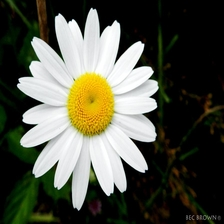

In [ ]:
image

In [ ]:
def Prediction(img):
  new_image_arr = np.asarray(img)
  new_image_arr = cv2.resize(new_image_arr, (224, 224))
  new_image_arr = np.expand_dims(new_image_arr, axis=0)
  normalized_image = new_image_arr.astype(np.float32) / 255.0
  normalized_image = np.array(normalized_image)
  #print(normalized_image.shape)
  pred = model_1.predict(new_image_arr)
  Predicted_class = np.argmax(pred)
  return f"User Provided image, is predicted with around 70 % accuracy using a CNN model. Prediction suggest that it could belong to Class : {Predicted_class}"


In [ ]:
Prediction(image)

'User Provided image, is predicted with around 70 % accuracy using a CNN model. Prediction suggest that it could belong to Class : 2'